# Edge detection (Canny)

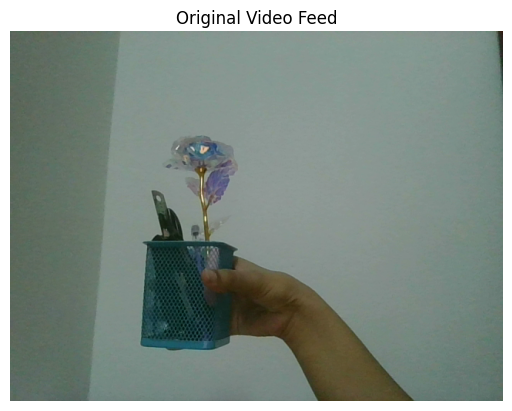

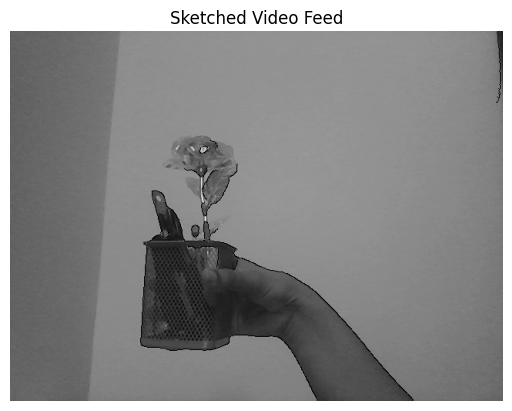

Press 'q' and Enter to stop: q
Resources released.


In [1]:
# Shreya Tripathi
# 22BAI10033

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply the sketch effect
def sketch(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray_blur = cv2.GaussianBlur(img_gray, (15, 15), 0)
    canny_edges = cv2.Canny(img_gray_blur, 10, 70)
    ret, mask = cv2.threshold(canny_edges, 70, 255, cv2.THRESH_BINARY)
    inverted_mask = cv2.bitwise_not(mask)
    img_gray_bgr = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
    sketch_image = cv2.bitwise_and(img_gray_bgr, img_gray_bgr, mask=inverted_mask)
    return sketch_image

# Function to display frames using matplotlib
def display_frame(frame, title="Frame"):
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show(block=False)
    plt.pause(0.01)
    plt.clf()

# Initialize the webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Cannot access the webcam.")
    exit()

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Apply the sketch effect
        sketched_frame = sketch(frame)

        # Display the frames
        display_frame(frame, "Original Video Feed")
        display_frame(sketched_frame, "Sketched Video Feed")

        # Stop loop based on user input
        stop = input("Press 'q' and Enter to stop: ")
        if stop == 'q':
            break

finally:
    cap.release()
    plt.close()
    print("Resources released.")

---

This code captures live video from the webcam, applies a sketch effect to each frame, and displays both the original video and the sketched version side-by-side using Matplotlib. The `sketch()` function processes each frame by converting it to grayscale, applying Gaussian blur to reduce noise, detecting edges using the Canny method, and creating an inverted binary mask to generate a sketch-like effect. The video streams refresh dynamically in a loop, and the user can stop the video feed by typing 'q'. Resources like the webcam and Matplotlib windows are released and closed properly after exiting.

#### Whats Edge detection?
Canny edge detection is a popular image processing technique used to identify edges in an image. It detects areas of rapid intensity change, which often correspond to the boundaries of objects. The process involves several key steps:

1. **Grayscale Conversion**: The input image is converted to grayscale to simplify processing.
2. **Gaussian Blur**: A Gaussian filter is applied to the grayscale image to reduce noise and avoid false edge detection.
3. **Gradient Computation**: The gradient (rate of intensity change) of the image is calculated using Sobel operators to find edge strength and direction.
4. **Non-Maximum Suppression**: Thin out the edges by keeping only the pixels with the maximum gradient magnitude in the direction of the edge.
5. **Double Thresholding**: Classify edges into strong, weak, and non-edges based on intensity thresholds. Strong edges are retained, and weak edges are kept only if connected to strong edges.
6. **Edge Tracking by Hysteresis**: Final edges are determined by tracing weak edges connected to strong edges, ensuring continuity.

Canny edge detection is effective at detecting edges with minimal noise, making it widely used in applications like object detection, image segmentation, and computer vision tasks.